In [11]:
import pandas as pd
import numpy as np
import pickle
import math
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV, StratifiedShuffleSplit
from sklearn.neural_network import MLPClassifier
from sklearn.mixture import GaussianMixture
from sklearn.metrics import make_scorer, roc_auc_score, accuracy_score, average_precision_score, f1_score, silhouette_score, v_measure_score
from sklearn.cluster import KMeans
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
import matplotlib.pyplot as plt
from IPython.display import display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [12]:
seed = 0
dataset1_df = pd.read_csv("dataset1/processed_full_data.csv")
dataset2_df = pd.read_csv("dataset2/processed_full_data.csv")

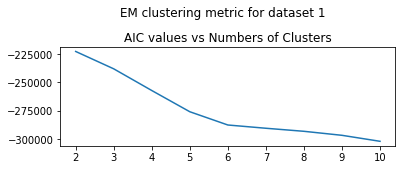

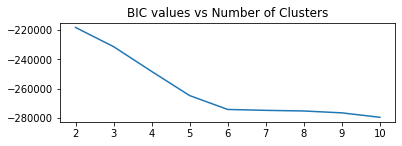

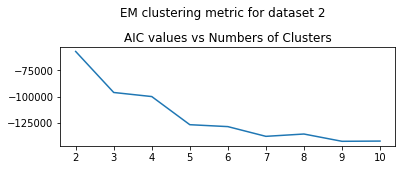

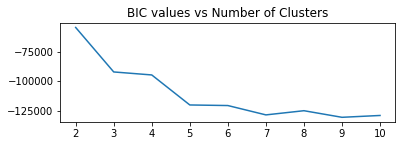

In [14]:
for idx, df in enumerate([dataset1_df, dataset2_df]):
    features = list(set(df.columns) - set(['label']))
    X = df[features]
    Y = df['label']
    aic_list = []
    bic_list = []
    K = np.arange(2,11)
    for k in K:
        EM = GaussianMixture(n_components=k, n_init = 5, random_state=seed)
        EM.fit(X)
        cluster_labels = EM.predict(X)
        aic = EM.aic(X)
        aic_list.append(aic)
        bic = EM.bic(X)
        bic_list.append(bic)
        
    plt.suptitle(f'EM clustering metric for dataset {idx+1}', y=1.02)
    
    plt.subplot(211)
    plt.plot(K, aic_list)
    plt.title("AIC values vs Numbers of Clusters")
    plt.show()
    
    plt.subplot(212)
    plt.plot(K, bic_list)
    plt.title("BIC values vs Number of Clusters")
    plt.show()